In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# some settings

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


## Warmup exercise

In [15]:
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Linear Regression

In [16]:
data = pd.read_csv('res/ex1data1.txt', header= None, names= ['Population','Profit'])

(4, 25)

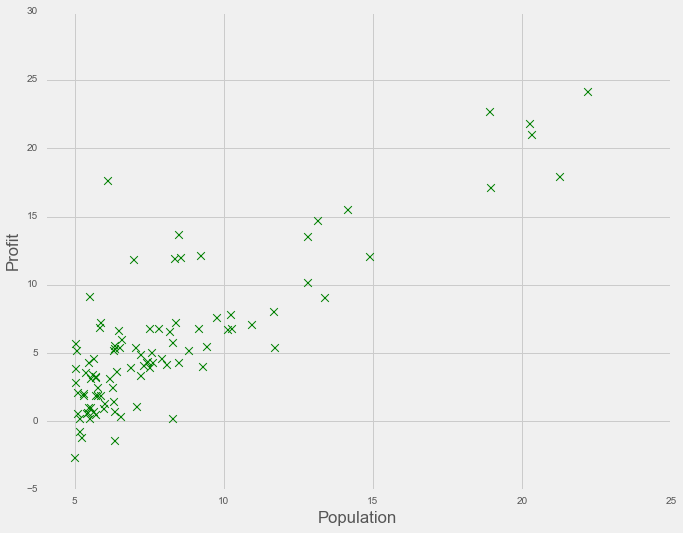

In [87]:
plt.scatter(data.Population, data.Profit, s=60, c='g', marker='x', linewidths=1)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.xlim(4,25)

## Gradient Descent 

Cost function for linear regression:

$$ J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$$

$$ \begin{align*}
\text{repeat until convergence: } \lbrace & \newline 
\theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline
\theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline
\rbrace&
\end{align*} $$

In [44]:
def gradcost(X, y, theta= [[0],[0]]):
    m = y.size
    J = 0    
    h = X.dot(theta)    
    J = np.sum(np.square(h-y))/(2*m)
    return J

In [45]:
X = data.Population.values
y = data.Profit.values

In [46]:
# prepend with 1's
X = np.c_[np.ones(X.shape), X]
y = np.c_[y]

In [47]:
gradcost(X,y)

32.072733877455676

In [62]:
def optimgrad(X, y, theta = [[0],[0]], num_iters= 1500, alpha = 0.01):
    m= y.size
    J_history = np.zeros(num_iters)
    for item in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha/(m)*(X.T.dot(h-y))
        J_history[item] = gradcost(X,y, theta)
    return theta, J_history

In [63]:
theta , Cost_J = optimgrad(X, y)

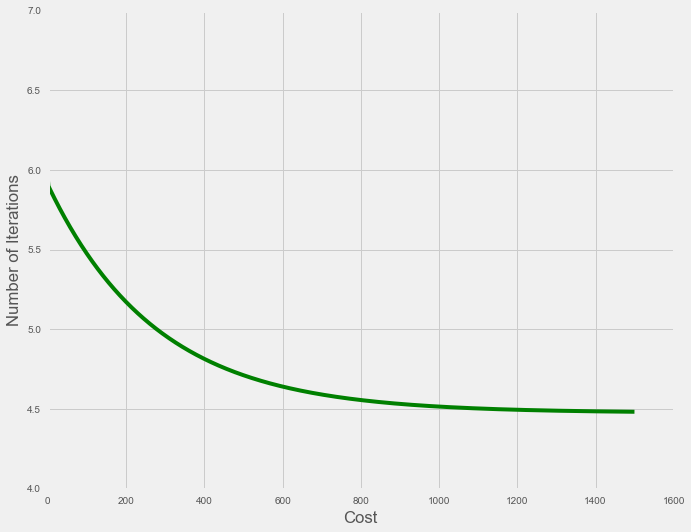

In [81]:
plt.plot(Cost_J, color = 'g')
plt.xlabel('Cost')
plt.ylabel('Number of Iterations')

## Plot Linear Regression

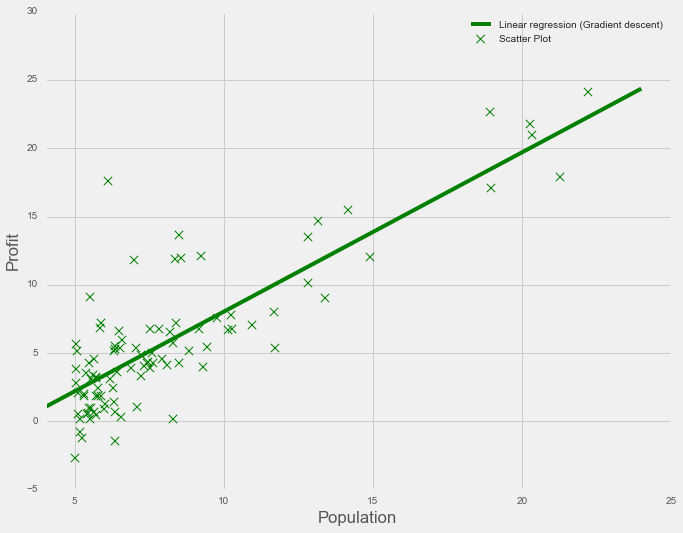

In [90]:
plt.scatter(data.Population, data.Profit, s=70, c='g', marker='x', linewidths=1, label= 'Scatter Plot')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.xlim(4,25)


x1 = np.arange(4,25)
y1 = theta[0] + theta[1] * x1
plt.plot(x1,y1, label='Linear regression (Gradient descent)', color = 'g')

plt.legend()